In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Tensors

## Dimensional Tensors

In [3]:
v = torch.tensor([1,2,3,4,5,6])
print(v[1:4])

tensor([2, 3, 4])


In [4]:
f = torch.FloatTensor([1,2,3,4,5,6])
print(f.size())

torch.Size([6])


In [5]:
v.view(6,1) # 원래 값과 같은 차원이어야 함

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [6]:
v.view(5,1) # Error

RuntimeError: shape '[5, 1]' is invalid for input of size 6

In [7]:
v.view(3,2) # 원래 값과 같은 차원이어야 함

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [8]:
v.view(3,-1) # -1을 입력할 경우, 값을 알아서 채워줌

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## Numpy - Torch 변환

In [9]:
a = np.array([1,2,3,4,5])
tensor_cnv = torch.from_numpy(a)
print(tensor_cnv)
print(tensor_cnv.type())

tensor([1, 2, 3, 4, 5])
torch.LongTensor


In [10]:
numpy_cnv  = tensor_cnv.numpy()
print(numpy_cnv)

[1 2 3 4 5]


# 2. Vector Operations

In [11]:
t_one = torch.tensor([1,2,3])
t_two= torch.tensor([1,2,3])
dot_product = torch.dot(t_one, t_two)

print(t_one + t_two)
print(t_one * t_two)
print(dot_product)

tensor([2, 4, 6])
tensor([1, 4, 9])
tensor(14)


## Plot torch tensor

In [ ]:
torch.linspace(0, 10, 20) # 0 ~ 10 사이의 같은 간격의 값을 20개 출력

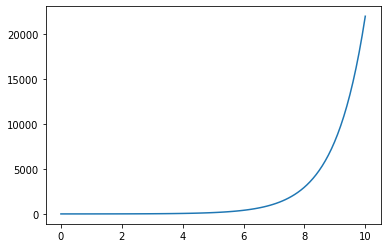

In [18]:
x = torch.linspace(0,10,100)
y = torch.exp(x)
plt.plot(x.numpy(), y.numpy())

## 2 Dimensional Tensors

In [22]:
one_d = torch.arange(0, 9)
one_d # 1-dimensional tensors

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
two_d = one_d.view(3, 3)
two_d # 2-dimensional tensors

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [25]:
two_d.dim()

2

In [30]:
print(two_d[0,2]) # 
print(two_d[1,2]) # 
print(two_d[2,2]) # 

tensor(2)
tensor(5)
tensor(8)


## 3 Dimensional Tensors

In [37]:
x = torch.arange(18).view(3,2,3) # 3-dimensional tensors
print(torch.arange(18).view(2,3,3))
print(torch.arange(18).view(3,3,2))

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])


In [44]:
print(x)
print(x[1,1,1])
print(x[1,1,0:3])
print(x[1,:,:])

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])
tensor(10)
tensor([ 9, 10, 11])
tensor([[ 6,  7,  8],
        [ 9, 10, 11]])


## Matrix Multiplication

https://www.mathsisfun.com/algebra/matrix-multiplying.html

![image](../resources/matrix_multiplication_small.png)

In [50]:
mat_a = torch.tensor([0,3,5,5,5,2]).view(2,3)
mat_a

tensor([[0, 3, 5],
        [5, 5, 2]])

In [51]:
mat_b = torch.tensor([3,4,3,-2,4,-2]).view(3,2)
mat_b

tensor([[ 3,  4],
        [ 3, -2],
        [ 4, -2]])

In [52]:
torch.matmul(mat_a, mat_b)

tensor([[ 29, -16],
        [ 38,   6]])

In [53]:
mat_a @ mat_b

tensor([[ 29, -16],
        [ 38,   6]])

## Gradient in Pytorch(기울기, 미분의 결과값)

### 아래의 식에서 x=3 인 경우,
 - f(3) = 81 - 5 * 9 + 12 * 3 - 3 = 69
 - f'(3) = 4 * 27 - 10 * 3 + 12 = 90

![](../resources/derivatives_example.png)

In [74]:
x = torch.tensor(3.0, requires_grad=True) # gradient 계산을 위해서는 requires_grad=True로 두어야 함
y = x**4 - 5*x**2 + 12*x -3
y.backward()

print(y)
print(x.grad)

tensor(69., grad_fn=<SubBackward0>)
tensor(90.)


In [75]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3 
y.backward()

print(y)
print(x.grad)
print(z.grad)

tensor(9., grad_fn=<AddBackward0>)
tensor(2.)
tensor(12.)
